In [1]:
%load_ext lab_black
# autoformats code nicely

# imports and workspace setup
%matplotlib inline
from numba import njit
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [2]:
## enables equation numbering

In [3]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "all" },
          TagSide: "left"
         }
});

<IPython.core.display.Javascript object>

## Cass-Koopmans Optimal Growth Model

**Coauthor: Brandon Kaplowitz**



This lecture describes a model that Tjalling Koopmans  [[Koopmans]](https://lectures.quantecon.org/py/zreferences.html#koopmans) and David Cass  [[Cass]](https://lectures.quantecon.org/py/zreferences.html#cass) used to analyze optimal growth

The model can be viewed as an extension of the model of Robert Solow described in this lecture  [an earlier lecture](https://lectures.quantecon.org/py/python_oop.html#) but adapted to make the savings rate the outcome of an optimal choice

(Solow assumed a constant saving rate determined outside the model)

   

We describe two versions of the model to illustrate what is in fact a more general connection between a **planned economy**
and an economy organized as a **competitive equilibrium** 

The lecture uses  important ideas including 

 
 * A max-min problem for solving a planning problem
 
 * A **shooting algorithm** for solving difference equations subject to initial and terminal conditions
     
 * An application of a **guess and verify** method for solving a system of difference equations 

        
 * A **turnpike** property that describes optimal paths for long-but-finite horizon economies 
 


## The Growth Model


Time is discrete and takes values $t = 0, 1 , \ldots, T$.  

(We leave open the possibility that $T = + \infty$, but that will require special care
in interpreting and using  **terminal condition**  on $K_t$ at $t = T+1$ to be described below)

A  single good  can either be consumed or invested
in physical capital.

The consumption good is not durable and depreciates completely if not consumed immediately

The capital good is durable but depreciates each period at rate $\delta \in (0,1)$

We let $C_t$ be  a nondurable consumption good  at time t.

Let $K_t$ be the stock of physical capital per capita  at time t. 

Let  $\vec{C}$=$\{C_0,\dots, C_T\}$ and $\vec{K}$=$\{K_1,\dots,K_{T+1}\}$




The representative household  has preferences over consumption bundles ordered by the utility functional:
<a id='1.1'></a>
$$\begin{equation} U(\vec{C}) = \sum_{t=0}^{T} \beta^t \frac{C_t^{1-\gamma}}{1-\gamma} \tag{1.1} \label{1.1} \end{equation},$$

where $\beta \in (0,1) $is a discount factor and $\gamma >0$ governs the curvature of
the one-period utility function. This is called a constant relative risk aversion utility function.


Note that  $$\tag{1.1*} u(C_t) =  \frac{C_t^{1-\gamma}}{1-\gamma} \label{utility}$$ satisfies $u'>0,u''<0$. 


We assume that  $K_0 >  0$ is  a given exogenous level of initial capital.

There is an economy-wide production function 
<a id='1.2'></a>
$$\begin{equation}f = A K_t^{\alpha} \tag{1.2} \label{1.2} \end{equation}$$

with $0 < \alpha<1$,$A > 0$



A feasible allocation $\vec C, \vec K$ satisfies
<a id='1.3'></a>
$$\begin{equation}C_t + K_{t+1} = f(K_t) + (1-\delta) K_t, \quad \text{for all } t \in [0, T] \tag{1.3} \label{1.3}  \end{equation}$$

where $\delta \in (0,1)$ is a depreciation rate of capital.

Note, we can use this and plug back into our reward function to get:

$$\tag{1.1**} u(C_t) =\frac{(f(K_t)+(1-\delta)K_t -K_{t+1})^{1-\gamma}}{1-\gamma} \label{utility new}$$
which is exactly the form of $F_(x_t,x_{t+1})$ here.


### Planning problem

A planner chooses an allocation $\{\vec{C},\vec{K}\}$to maximize $(\ref{1.1})$ subject to$(\ref{1.3})$.



Let $\vec{\mu}=\{\mu_0,\dots,\mu_T\}$ be a sequence of nonnegative **Lagrange multipliers** 

To find an optimal allocation, we form a Lagrangian

$$\mathcal{L}(\vec{K}',\vec{\mu})=\sum_{t=0}^T \beta^t\left\{ u(K_t,K_{t+1})+ \mu_t \left(f(K_t) + (1-\delta) K_t- C_t - K_{t+1} \right)\right\}  $$ 
and then solve the following max-min problem:

<a id='1.4'></a>
$$\begin{equation}\max_{\vec{K}'}\min_{\vec{\mu}}\mathcal{L}(\vec{K}',\vec{\mu}) \tag{1.4}\end{equation}$$



### Back to solving the problem

To solve the Lagrangian extremization problem, we compute first derivatives of the Lagrangian and set them equal to 0.

  * **Note:** Our objective function and constraints satisfy conditions that work to assure that required second-order conditions are satisfied at an allocation that satisfies the first-order conditions that we are about to compute.



Here are the **first order necessary conditions** for extremization (i.e., maximization
with respect to $\vec C, \vec K$, minimization with respect to $\vec \mu$):

<a id='1.10'></a>
<a id='1.11'></a>
<a id='1.12'></a>
<a id='1.13'></a>
$$\begin{align}  \tag{1.10} \label{1.10} &&& C_t:& \quad \frac{\partial u(K_t,K_{t+1})}{\partial K_{t+1}}-\mu_t=0 \quad &&\text{for all } t=0,1,\dots,T \\ &&& K_t:& \quad \beta \mu_t\left[(1-\delta)+f'(K_t)\right] -\mu_{t-1}=0 \quad &&\text{for all } t=1,2,\dots,T+1 \tag{1.11} \label{1.11}\\&&& \mu_t:&  \quad f(K_t)+ (1-\delta) K_t  - C_t - K_{t+1}=0 \quad &&\text{for all } t=0,1,\dots,T \tag{1.12} \label {1.12}\\ &&& K_{T+1}:& \quad -\mu_T \leq 0, \ <0 \text{ if } K_{T+1}=0; \ =0 \text{ if } K_{T+1}>0  \tag{1.13} \label{1.13} \end{align}$$




Note that $(\ref{1.12})$comes from the occurrence  of $K_t$ in both the period 
$t$ and period $t-1$ feasibility  constraints


$(\ref{1.13})$ comes from differentiating with respect to $K_{T+1}$ in the last period 
and applying the following condition called a **Karush-Kuhn-Tucker condition** (KKT):

<a id='1.14'></a>
$$\mu_T k_{T+1}=0  \tag{1.14} \label{KKT}$$ 

See [Karush-Kuhn-Tucker](en.wikipedia.org/wiki/Karush-Kuhn-Tucker_conditions). 


Combining  $(\ref{1.10})$and$(\ref{1.11})$ gives 

<a id='1.5'></a>
$$u'\left(C_t\right)\left[(1-\delta)+f'\left(K_t\right)\right]-u'\left(C_{t-1}\right)=0 \quad \text{ for all } t=1,2,\dots, T+1. \tag{1.15}$$ 

Rewriting gives

<a id='1.16'></a>
$$u'\left(C_{t+1}\right)\left[(1-\delta)+f'\left(K_{t+1}\right)\right]=u'\left(C_{t}\right) \quad \text{ for all } t=0,1,\dots, T. \tag{1.16}$$ 

Taking the inverse of the utility function on both sides of the above equation gives

<a id='1.17'></a>
$$C_{t+1} =u'^{-1}\left(\left(\frac{\beta}{u'(C_t)}[f'(K_{t+1}) +(1-\delta)]\right)^{-1}\right) \tag{1.17}$$

or using our utility function $(\ref{utility})$
<a id='1.18'></a>

$$\begin{align} C_{t+1} =\left(\beta C_t^{\gamma}[f'(K_{t+1}) +(1-\delta)]\right)^{1/\gamma} \notag\\= C_t\left(\beta [f'(K_{t+1}) +(1-\delta)]\right)^{1/\gamma} \tag{1.18} \end{align}$$

The above first-order condition for consumption is called an  **Euler equation**  

It tells us how consumption in adjacent periods are optimally related to each other and to capital next period

Note we never checked sufficiency here. Why don't we need no-ponzi?

We now use some of the the equations above to calculate some variables and functions  that
we'll soon use to solve the planning problem with Python 



In [4]:
# Parameter Values

δ = 0.02  # depreciation rate on capital
ᾱ = 0.33  # return to capital per capita
γ̄ = 2.0  # coefficient of relative risk aversion
T = 10  # maximum time period

Ā = 1.0  # technology
β = 0.95  # discount rate


# utility function and its derivative.
# ASIDE: If you have a utility function that is hard to  solve by hand
# you can use automatic or symbolic  differentiation. See https://github.com/HIPS/autograd
# we use a decorator called 'njit' to speed up our code.
@njit  # this can be ignored where it occurs. Behind the scenes it is compiling our functions to make them run faster.
def u(c, γ):
    if γ == 1:
        return np.log(
            c
        )  ## if γ=1 we can show via L'hopital's Rule that the utility becomes log.
    else:
        return c ** (1 - γ) / (1 - γ)


@njit
def u_prime(c, γ):  # derivative of utility
    if γ == 1:
        return 1 / c
    else:
        return c ** (-γ)


@njit
def u_prime_inv(c, γ):  # 1/derivative of utility
    if γ == 1:
        return c
    else:
        return c ** (-1 / γ)


# production function and its derivative
# (again the derivative can be calculated via automatic differentiation if hard to do by hand)
@njit
def f(A, k, α):
    return A * k ** α


@njit
def f_prime(A, k, α):
    return α * A * k ** (α - 1)


@njit
def f_prime_inv(A, k, α):
    return (k / (A * α)) ** (1 / (α - 1))


# define an initial value for all c

C = np.zeros(T + 1)  # T periods of consumption initialized to 0
K = np.zeros(
    T + 2
)  # T periods of capital initialized to 0. T+2 to include t+1 variable as well.

## Value Function Iteration

Previously mentioned so won't spend too much time on this here. 

The basic steps will be:
1. Form an appropriate Bellman equation
2. Iterate backwards from the terminal period if finite length problem, or from initial guess if infinite length problem
3. Check for convergence and if infinite horizon, verify transversality condition is satisfied.



We can fundamentally view this in the form of a 'cobwebb plot'. Plot policy func and 45 degree line. Why 


## Shooting Method

We shall use a  **shooting method** to compute an optimal allocation $\vec C, \vec K$ and an associated Lagrange
multiplier sequence $\vec \mu$ 

The first-order necessary conditions for the planning problem, namely, equations ([1.10](#1.10)), ([1.11](#1.11)),
and ([1.12](#1.12)), form a system of **difference equations** with two boundary conditions:

  * $K_0$ is a given **initial condition** for capital
  
  * $K_{T+1} =0$ is a **terminal condition** for capital that we deduced from the first-order necessary condition for $K_{T+1}$, the KKT condition ([1.14](#1.14))
  
We have no initial condition for the Lagrange multiplier $\mu_0$.
  
If we did, solving for the allocation would be simple:

  * Given $\mu_0$and $k_0$, we could compute $c_0 $ from equation ([1.10](#1.10)) and then $k_1$ from equation ([1.12](#1.12)) and$\mu_1$ from equation ([1.11](#1.11))
  
  * We could then iterate on to compute the remaining elements of $\vec C, \vec K, \vec \mu$ 
 
But we don't have an initial condition for $\mu_0$, so this won't work

But a simple modification  called the **shooting algorithm**  will work.

The **shooting algorithm** is an instance of a **guess and verify** algorithm

It proceeds as follows:

  * Guess a value for the initial Lagrange multiplier $\mu_0$ 
   
  * Apply the **simple algorithm** described above
  
  * Compute the implied value of $k_{T+1}$ and check whether it equals zero
  
  * If the implied $K_{T+1} =0$, we have solved the problem
  
  * If $K_{T+1} > 0 $, lower$\mu_0$ and try again
  
  * If $K_{T+1} < 0$, raise$\mu_0$ and try again


The following Python code implements the shooting algorithm for the planning problem

We make a slight modification starting with a guess of $c_0$but since $c_0$ is a function of$\mu_0$ there is no difference to the procedure above

We'll apply it with an initial guess that will turn out not to be perfect, as we'll soon see
  
  

The path of K is:
[ 0.3         0.76612495  1.43810091  2.28880196  3.2959378   4.44174982
  5.71180349  7.09406991  8.57830225 10.15561243 11.81817668 13.55902526]
The path of C is:
[0.2        0.22853998 0.24791735 0.26131611 0.27055886 0.27677065
 0.28069289 0.28284043 0.28358582 0.28320773 0.28192015]


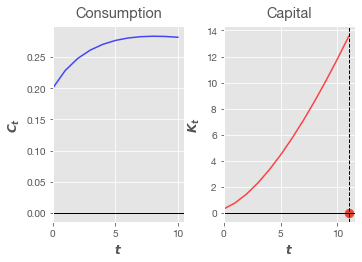

In [26]:
# Initial Guesses
K[0] = 0.3  # initial k
C[0] = 0.2  # our guess of c_0.
# To solve this we will write this as a loop. We could also use recursion.
@njit


###SHOOTING METHOD###
def shooting_method(cs, k, Ts, γ̄=γ̄, δ=δ, β=β, ᾱ=ᾱ, Ā=Ā):
    for t in range(Ts):
        k[t + 1] = (
            f(A=Ā, k=k[t], α=ᾱ) + (1 - δ) * k[t] - cs[t]
        )  # equation 1 with inequality
        if k[t + 1] < 0:  # ensure nonnegativity
            k[t + 1] = 0
            # equation 2*. #We keep in the general form to show how we would solve if we didn't want to do any simplification.
        if (β * (f_prime(A=Ā, k=k[t + 1], α=ᾱ) + (1 - δ))) == np.inf:
            cs[
                t + 1
            ] = 0  ## this only occurs if k[t+1] is 0, in which case, we won't produce anything next period, so consumption will have  to  be  0.
        else:
            cs[t + 1] = u_prime_inv(
                u_prime(c=cs[t], γ=γ̄)
                / (β * (f_prime(A=Ā, k=k[t + 1], α=ᾱ) + (1 - δ))),
                γ=γ̄,
            )
    k[Ts + 1] = (
        f(A=Ā, k=k[Ts], α=ᾱ) + (1 - δ) * k[Ts] - cs[Ts]
    )  # terminal condition calculation
    mu = u_prime(c=cs, γ=γ̄)
    print("The path of K is:")
    print(k)
    print("The path of C is:")
    print(cs)
    return (cs, k, mu)


# Now we run the shooting method

path_C, path_K, mu = shooting_method(C, K, T)

# Graphs

plt.subplot(131)
plt.plot(range(T + 1), path_C, color="blue", alpha=0.7)
plt.title("Consumption")
plt.ylabel("$C_t$")
plt.xlabel("$t$")
plt.xlim(0,)
plt.axhline(0, color="black", lw=1)

plt.subplot(132)
plt.plot(range(T + 2), path_K, color="red", alpha=0.7)
plt.axvline(11, color="black", ls="--", lw=1)
plt.axhline(0, color="black", lw=1)
plt.title("Capital")
plt.ylabel("$K_t$")
plt.xlim(0,)
plt.xlabel("$t$")
plt.scatter(11, 0, s=80)
plt.subplots_adjust(left=0.2, wspace=0.3, top=0.8)
plt.show()



plt.subplot(132)
plt.plot(range(T + 2), path_K, color="red", alpha=0.7)
plt.axvline(11, color="black", ls="--", lw=1)
plt.axhline(0, color="black", lw=1)
plt.title("Capital")
plt.ylabel("$K_t$")
plt.xlim(0,)
plt.xlabel("$t$")
plt.scatter(11, 0, s=80)
plt.subplots_adjust(left=0.2, wspace=0.3, top=0.8)
plt.show()

Evidently our initial guess for $\mu_0$ is too high and makes   initial consumption is too low

We know this becuase we miss our $K_{T+1}=0$ target on the high side
 

Now we automate things with a search-for-a-good $\mu_0$ algorithm that stops when we
hit the target $K_{t+1} = 0$ 

The search procedure is to  use a  **bisection method** 



Here is how we apply the bisection method

We take an initial guess for $C_0$(we can eliminate $\mu_0$ because$C_0$ is an exact
function of $\mu_0$)

We know that the lowest $C_0$can ever be is $0$ and the largest it can be is initial output$f(K_0)$. 


We take  a $C_0$guess and shoot forward to$T+1$.

If the $K_{T+1}>0$, let it be our new **lower** bound on$C_0$. 

If $K_{T+1}<0$, let it be  our new  **upper**  bound.

Make a new guess  for $C_0$ exactly halfway between our new upper and lower bounds

Shoot forward again and iterate the procedure

When $K_{T+1}$ gets close enough to 0 (within some error tolerance bounds), stop
and declare victory


In [32]:
%%capture

@njit

###BISECTION METHOD### 
def bisection_method(c_init_guess,c_val,k_val,T_val,γ̄=γ̄,δ=δ,β=β,ᾱ=ᾱ,Ā=Ā,tol=10**-4,max_iter=10000,terminal=0):
# tol degree of numerical precision
#max_iter maximum number of iterations
#terminal represents the value we are shooting towards,default is 0
    i=1 #initial iteration
    c_high=f(k=k_val[0],α=ᾱ,A=Ā) #initial high value of c
    c_low = 0 # initial low value of c
    c_val[0]=c_init_guess
    path_c,path_k, mu = shooting_method(c_val,k_val,T_val,γ̄,δ,β,ᾱ,Ā)
    while ((((path_k[T_val+1]-terminal)>tol)|((path_k[T_val+1]-terminal)<-tol)|(path_k[T_val]==(terminal)))&(i<max_iter)):
        print('Iteration: ',i)
        if((path_k[T_val+1]-terminal)>tol):
            c_low=c_val[0] #if assets are too high the c[0] we chose is now a lower bound on possible values of c[0]
        elif((path_k[T_val+1]-terminal)<-tol):
            c_high=c_val[0] #if assets fell too quickly, the c[0] we chose is now an upper bound on possible values of c[0]
        elif(path_k[T_val]==(terminal)):
            c_high=c_val[0] #if assets fell  too quickly, the c[0] we chose is now an upper bound on possible values of c[0]
        c_val[0]=(c_high+c_low)/2 #value in middle of high and low value. This is the bisection part
        path_c,path_k, mu = shooting_method(c_val,k_val,T_val,γ̄,δ,β,ᾱ,Ā)
        i=i+1
    if(((path_k[T_val+1]-terminal)<tol)&(path_k[T_val]!=terminal)&((path_k[T_val+1]-terminal)>-tol)):
       print('Converged successfully on iteration',i-1)
    else:
       print('Failed to converge and hit maximum iteration')
    # computes lagrange multiplier
    return (path_c.copy(),path_k.copy(),mu.copy())
#run bisection method
path_opt_C,path_opt_K,path_opt_mu=bisection_method(.3,C,K,T)

Now we can plot:

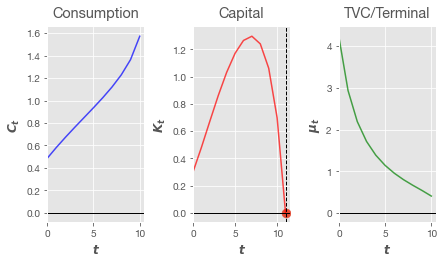

In [33]:
plt.subplot(131)
plt.plot(range(T + 1), path_opt_C, color="blue", alpha=0.7)
plt.title("Consumption")
plt.ylabel("$C_t$")
plt.xlabel("$t$")
plt.xlim(0,)
plt.axhline(0, color="black", lw=1)

plt.subplot(132)
plt.plot(range(T + 2), path_opt_K, color="red", alpha=0.7)
plt.axvline(11, color="black", ls="--", lw=1)
plt.axhline(0, color="black", lw=1)
plt.title("Capital")
plt.ylabel("$K_t$")
plt.xlim(0,)
plt.xlabel("$t$")
plt.scatter(11, 0, s=80)

plt.subplot(133)
plt.plot(range(T + 1), path_opt_mu, color="green", alpha=0.7)
plt.title("TVC/Terminal")
plt.ylabel("$TVC_t$")
plt.xlabel("$t$")
plt.xlim(0,)
plt.axhline(0, color="black", lw=1)
plt.subplots_adjust(left=0.0, wspace=0.5, top=0.8)

plt.show()

#### Setting $K_0$ equal to steady state

If $T \rightarrow +\infty$, the optimal allocation converges to steady state
values of $C_t$and$K_t$

It is instructive to compute these and then to set $K_0$ equal to its steady state value



In a steady state $K_{t+1} = K_t=\bar{K}$for all very large$t$
<a id='2.1'></a>
In a steady state the feasibility constraint ([1.3](#1.3)) is  

$$f(\bar{K})-\delta \bar{K} = \bar{C} \label{2.1} \tag{2.1}$$


Substituting $K_t = \bar K$and $C_t=\bar C$ for all$t$ into  ([1.16](#1.16)) gives 
<a id='2.2'></a>
$$1=\beta \frac{u'(\bar{C})}{u'(\bar{C})}[f'(\bar{K})+(1-\delta)] \tag{2.2} \label{2.2}$$

Defining $\beta = \frac{1}{1+\rho}$, and cancelling gives  
<a id='2.3'></a>
$$1+\rho = 1[f'(\bar{K}) + (1-\delta)] \tag{2.3} \label{2.3}$$
<a id='2.4'></a>
<a id='2.5'></a>
Simplifying  gives  $$f'(\bar{K}) = \rho +\delta \tag{2.4} \label{2.4}$$,$$\bar{K} = f'^{-1}(\rho+\delta) \tag{2.5} \label{2.5}$$

Using our production function ([1.2](#1.2)) gives :
<a id='2.6'></a>
$$\alpha \bar{K}^{\alpha-1} = \rho + \delta \tag{2.6} \label{2.6}$$

Finally, using $\alpha= .33$, $\rho = 1/\beta-1 =1/(19/20)-1 = 20/19-19/19 = 1/19$,$\delta = 1/50$, we get: 
<a id='2.7'></a>
$$\bar{K} = \left(\frac{\frac{33}{100}}{\frac{1}{50}+\frac{1}{19}}\right)^{\frac{67}{100}} \approx 9.57583  \tag{2.7} \label{2.7}$$

Let's verify this with Python and then use this steady state $\bar K$ as our initial capital
stock $K_0$

In [8]:
ρ = 1 / β - 1
K_ss = f_prime_inv(k=ρ + δ, A=Ā, α=ᾱ)

print("Steady state for capital is:", K_ss)

Steady state for capital is: 9.57583816331462


In [9]:
%%capture
K_init_val = K_ss #at our steady state
T_new=150
C_new=np.zeros(T_new+1)
K_new=np.zeros(T_new+2)
K_new[0]=K_init_val
path_opt_C_new,path_opt_K_new,path_opt_mu_new=bisection_method(.3,C_new,K_new,T_new)

betas = np.empty(np.shape(path_opt_mu_new))
betas[0]=1
betas[1:] = β
betas = np.cumprod(betas)
path_TVC = betas * path_opt_mu_new * path_opt_K_new[1:]

And now we plot

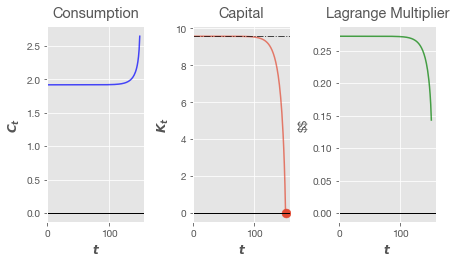

In [10]:
plt.subplot(131)
plt.plot(
    range(T_new + 1), path_opt_C_new, color="blue", alpha=0.7,
)

plt.title("Consumption")
plt.ylabel("$C_t$")
plt.xlabel("$t$")
plt.xlim(0,)
plt.axhline(0, color="black", lw=1)

plt.subplot(132)
plt.plot(range(T_new + 2), path_opt_K_new, alpha=0.7)
plt.axhline(K_ss, linestyle="-.", color="black", lw=1, alpha=0.7)
plt.axhline(0, color="black", lw=1)
plt.title("Capital")
plt.ylabel("$K_t$")
plt.xlabel("$t$")
plt.xlim(0,)
plt.scatter(T_new + 1, 0, s=80)
plt.subplot(133)
plt.plot(range(T_new + 1), path_opt_mu_new, color="green", alpha=0.7)
plt.title("Lagrange Multiplier")
plt.ylabel("$\$")
plt.xlabel("$t$")
plt.xlim(0,)
plt.axhline(0, color="black", lw=1)
plt.subplots_adjust(left=0.0, wspace=0.5, top=0.8)

plt.show()

Evidently in this economy with a large value of $T$,$K_t$ stays near its initial value
at the until the end of time approaches closely

Evidently, the planner likes the steady state capital stock and wants to stay near there for a long time


Let's see what happens when we push the initial $K_0$below$\bar K$



In [11]:
%%capture
K_init_val = K_ss/3 #below our steady state
T_new=150
C_new=np.zeros(T_new+1)
K_new=np.zeros(T_new+2)
K_new[0]=K_init_val
path_opt_C_new,path_opt_K_new,path_opt_mu_new=bisection_method(.3,C_new,K_new,T_new)

The following code plots the optimal allocation

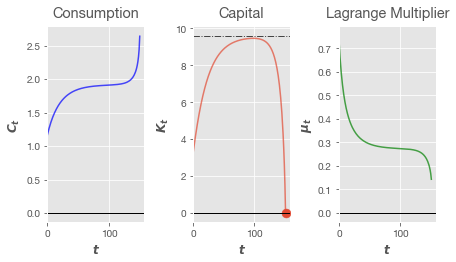

In [12]:
plt.subplot(131)
plt.plot(
    range(T_new + 1), path_opt_C_new, color="blue", alpha=0.7,
)

plt.title("Consumption")
plt.ylabel("$C_t$")
plt.xlabel("$t$")
plt.xlim(0,)
plt.axhline(0, color="black", lw=1)

plt.subplot(132)
plt.plot(range(T_new + 2), path_opt_K_new, alpha=0.7)
plt.axhline(K_ss, linestyle="-.", color="black", lw=1, alpha=0.7)
plt.axhline(0, color="black", lw=1)
plt.title("Capital")
plt.ylabel("$K_t$")
plt.xlabel("$t$")
plt.xlim(0,)
plt.scatter(T_new + 1, 0, s=80)
plt.subplot(133)
plt.plot(range(T_new + 1), path_opt_mu_new, color="green", alpha=0.7)
plt.title("Lagrange Multiplier")
plt.ylabel("$\mu_t$")
plt.xlabel("$t$")
plt.xlim(0,)
plt.axhline(0, color="black", lw=1)
plt.subplots_adjust(left=0.0, wspace=0.5, top=0.8)
plt.show()

Notice how the planner pushes capital toward the steady state, stays near there for a while, then pushes $K_t$toward the terminal value $K_{T+1} =0 $ as $t$ gets close to $T$


The following graphs compare outcomes as we vary $T$


In [34]:
%%capture
K_new[0]=K_init_val
path_opt_C_new,path_opt_K_new,path_opt_mu_new=bisection_method(.3,C_new,K_new,T_new)
betas = np.empty(np.shape(path_opt_mu_new))
betas[0]=1
betas[1:] = β
betas = np.cumprod(betas)
path_TVC = path_opt_mu_new*betas*path_opt_K_new[1:]
T_new_2=75
C_new_2=np.zeros(T_new_2+1)
K_new_2=np.zeros(T_new_2+2)
K_new_2[0]=K_init_val
path_opt_C_2,path_opt_K_2,path_opt_mu_new_2=bisection_method(.3,C_new_2,K_new_2,T_new_2);
betas_2 = np.empty(np.shape(path_opt_mu_new_2))
betas_2[0]=1
betas_2[1:] = β
betas_2 = np.cumprod(betas_2)
path_TVC_2 = path_opt_mu_new_2*betas_2*path_opt_K_2[1:]
T_new_3=50
C_new_3=np.zeros(T_new_3+1)
K_new_3=np.zeros(T_new_3+2)
K_new_3[0]=K_init_val
path_opt_C_3,path_opt_K_3,path_opt_mu_new_3=bisection_method(.3,C_new_3,K_new_3,T_new_3);
betas_3 = np.empty(np.shape(path_opt_mu_new_3))
betas_3[0]=1
betas_3[1:] = β
betas_3 = np.cumprod(betas_3)
path_TVC_3 = path_opt_mu_new_3*betas_3*path_opt_K_3[1:]
T_new_4=25
C_new_4=np.zeros(T_new_4+1)
K_new_4=np.zeros(T_new_4+2)
K_new_4[0]=K_init_val
path_opt_C_4,path_opt_K_4,path_opt_mu_new_4=bisection_method(.3,C_new_4,K_new_4,T_new_4);
betas_4 = np.empty(np.shape(path_opt_mu_new_4))
betas_4[0]=1
betas_4[1:] = β
betas_4 = np.cumprod(betas_4)
path_TVC_4 = path_opt_mu_new_4*betas_4*path_opt_K_4[1:]

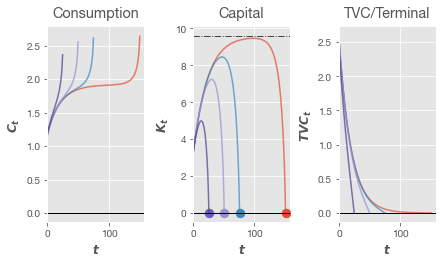

In [14]:
plt.subplot(131)
plt.plot(range(T_new + 1), path_opt_C_new, path_opt_C_2, alpha=0.7)
plt.plot(range(T_new_3 + 1), path_opt_C_3, alpha=0.7)
plt.plot(range(T_new_4 + 1), path_opt_C_4, color="darkslateblue", alpha=0.7)
plt.title("Consumption")
plt.ylabel("$C_t$")
plt.xlabel("$t$")
plt.xlim(0,)
plt.axhline(0, color="black", lw=1)

plt.subplot(132)
plt.plot(range(T_new + 2), path_opt_K_new, path_opt_K_2, alpha=0.7)
plt.plot(range(T_new_3 + 2), path_opt_K_3, alpha=0.7)
plt.plot(range(T_new_4 + 2), path_opt_K_4, color="darkslateblue", alpha=0.7)
plt.axhline(0, color="black", lw=1)
plt.axhline(K_ss, linestyle="-.", color="black", lw=1, alpha=0.7)
plt.title("Capital")
plt.ylabel("$K_t$")
plt.xlabel("$t$")
plt.xlim(0,)
plt.scatter(T_new + 1, 0, s=80)
plt.scatter(T_new_2 + 1, 0, s=80)
plt.scatter(T_new_3 + 1, 0, s=80)
plt.scatter(T_new_4 + 1, 0, s=80, color="slateblue")
plt.subplots_adjust(left=0.2, wspace=0.5, top=0.8)

plt.subplot(133)
plt.plot(range(T_new + 1), path_TVC, path_TVC_2, alpha=0.7)
plt.plot(range(T_new_3 + 1), path_TVC_3, alpha=0.7)
plt.plot(range(T_new_4 + 1), path_TVC_4, color="darkslateblue", alpha=0.7)
plt.title("TVC/Terminal")
plt.ylabel("$TVC_t$")
plt.xlabel("$t$")
plt.xlim(0,)
plt.axhline(0, color="black", lw=1)
plt.subplots_adjust(left=0.0, wspace=0.5, top=0.8)
plt.show()

The following calculation shows that when   we set  $T$ very large
the planner makes the capital stock spend most of its time close to its steady state value.


In [15]:
%%capture
T_new_large=250
C_new_large=np.zeros(T_new_large+1)
K_new_large=np.zeros(T_new_large+2)
K_new_large[0]=K_init_val
path_opt_C_large,path_opt_K_large,path_opt_mu_large=bisection_method(.3,C_new_large,K_new_large,T_new_large);

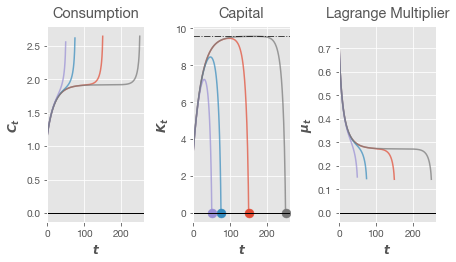

In [16]:
plt.subplot(131)
plt.plot(range(T_new + 1), path_opt_C_new, path_opt_C_2, alpha=0.7)
plt.plot(range(T_new_3 + 1), path_opt_C_3, alpha=0.7)
plt.plot(range(T_new_large + 1), path_opt_C_large, alpha=0.7)
plt.title("Consumption")
plt.ylabel("$C_t$")
plt.xlabel("$t$")
plt.xlim(0,)
plt.axhline(0, color="black", lw=1)

plt.subplot(132)
plt.plot(range(T_new + 2), path_opt_K_new, path_opt_K_2, alpha=0.7)
plt.plot(range(T_new_3 + 2), path_opt_K_3, alpha=0.7)
plt.plot(range(T_new_large + 2), path_opt_K_large, alpha=0.7)
plt.axhline(0, linestyle="-", color="black", lw=1)
plt.axhline(K_ss, linestyle="-.", color="black", lw=1, alpha=0.7)
plt.title("Capital")
plt.ylabel("$K_t$")
plt.xlabel("$t$")
plt.xlim(0,)
plt.scatter(T_new + 1, 0, s=80)
plt.scatter(T_new_2 + 1, 0, s=80)
plt.scatter(T_new_3 + 1, 0, s=80)
plt.scatter(T_new_large + 1, 0, s=80)
plt.subplot(133)
plt.plot(range(T_new + 1), path_opt_mu_new, path_opt_mu_new_2, alpha=0.7)
plt.plot(range(T_new_3 + 1), path_opt_mu_new_3, alpha=0.7)
plt.plot(range(T_new_large + 1), path_opt_mu_large, alpha=0.7)
plt.title("Lagrange Multiplier")
plt.ylabel("$\mu_t$")
plt.xlabel("$t$")
plt.xlim(0,)
plt.axhline(0, color="black", lw=1)
plt.subplots_adjust(left=0.0, wspace=0.5, top=0.8)
plt.show()

The different colors in the above graphs are tied to outcomes with different horizons $T$

Notice that as the hoizon increases, the planner puts $K_t$ closer to the steady state
value $\bar K$ for longer.  

This pattern reflects a **turnpike** property of the steady state.

A rule of thumb for the planner is 

  * for whatever $K_0$you start with, push$K_t$ toward the stady state and stay there for as long as you can
  
In loose language

  * head for the turnpick and stay near it for as long as you can

As we drive $T $toward $+\infty$, the planner keeps$K_t$ very close to its steady state
for all dates after some transition toward the steady state


The planner makes the saving rate $\frac{f(K_t) - C_t}{f(K_t)}$ vary over time

Let's calculate it


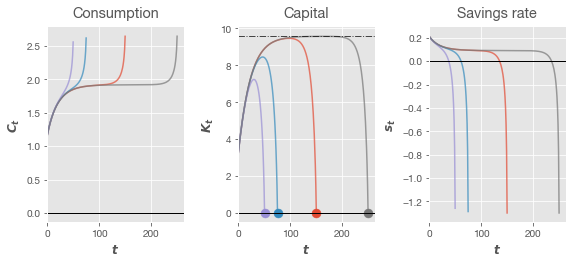

In [17]:
# savings calculation and plotting:

##Aggregate savings
def S(K, δ, T):
    S = np.zeros(T + 1)
    for t in range(0, T + 1):
        S[t] = K[t + 1] - (1 - δ) * K[t]
    return S


# savings rate
def s(A, K, α, δ, T):
    S_var = np.zeros(T + 1)
    S_var = S(K, δ, T)
    Y = f(A, K, α)
    Y_var = Y[0 : T + 1]
    s = S_var / Y_var
    return s


path_opt_s_new = s(Ā, path_opt_K_new, ᾱ, δ, T_new)
path_opt_s_2 = s(Ā, path_opt_K_2, ᾱ, δ, T_new_2)
path_opt_s_3 = s(Ā, path_opt_K_3, ᾱ, δ, T_new_3)
path_opt_s_large = s(Ā, path_opt_K_large, ᾱ, δ, T_new_large)

plt.subplot(131)
plt.plot(range(T_new + 1), path_opt_C_new, path_opt_C_2, alpha=0.7)
plt.plot(range(T_new_3 + 1), path_opt_C_3, alpha=0.7)
plt.plot(range(T_new_large + 1), path_opt_C_large, alpha=0.7)
plt.title("Consumption")
plt.ylabel("$C_t$")
plt.xlabel("$t$")
plt.xlim(0,)
plt.axhline(0, color="black", lw=1)

plt.subplot(132)
plt.plot(range(T_new + 2), path_opt_K_new, path_opt_K_2, alpha=0.7)
plt.plot(range(T_new_3 + 2), path_opt_K_3, alpha=0.7)
plt.plot(range(T_new_large + 2), path_opt_K_large, alpha=0.7)
plt.axhline(0, linestyle="-", color="black", lw=1)
plt.axhline(K_ss, linestyle="-.", color="black", lw=1, alpha=0.7)
plt.title("Capital")
plt.ylabel("$K_t$")
plt.xlabel("$t$")
plt.xlim(0,)
plt.scatter(T_new + 1, 0, s=80)
plt.scatter(T_new_2 + 1, 0, s=80)
plt.scatter(T_new_3 + 1, 0, s=80)
plt.scatter(T_new_large + 1, 0, s=80)
plt.subplot(133)
plt.plot(range(T_new + 1), path_opt_s_new, path_opt_s_2, alpha=0.7)
plt.plot(range(T_new_3 + 1), path_opt_s_3, alpha=0.7)
plt.plot(range(T_new_large + 1), path_opt_s_large, alpha=0.7)
plt.axhline(0, color="black", lw=1)
plt.title("Savings rate")
plt.ylabel("$s_t$")
plt.xlabel("$t$")
plt.xlim(0,)
plt.subplots_adjust(left=0.0, wspace=0.4, top=0.8, right=1.2)
plt.show()

#### Overshooting

In [22]:
%%capture
K_new[0]=K_init_val+10
path_opt_C_new,path_opt_K_new,path_opt_mu_new=bisection_method(.3,C_new,K_new,T_new)
betas = np.empty(np.shape(path_opt_mu_new))
betas[0]=1
betas[1:] = β
betas = np.cumprod(betas)
path_TVC = path_opt_mu_new*betas*path_opt_K_new[1:]
T_new_2=75
C_new_2=np.zeros(T_new_2+1)
K_new_2=np.zeros(T_new_2+2)
K_new_2[0]=K_init_val+10
path_opt_C_2,path_opt_K_2,path_opt_mu_new_2=bisection_method(.3,C_new_2,K_new_2,T_new_2);
betas_2 = np.empty(np.shape(path_opt_mu_new_2))
betas_2[0]=1
betas_2[1:] = β
betas_2 = np.cumprod(betas_2)
path_TVC_2 = path_opt_mu_new_2*betas_2*path_opt_K_2[1:]
T_new_3=50
C_new_3=np.zeros(T_new_3+1)
K_new_3=np.zeros(T_new_3+2)
K_new_3[0]=K_init_val+10
path_opt_C_3,path_opt_K_3,path_opt_mu_new_3=bisection_method(.3,C_new_3,K_new_3,T_new_3);
betas_3 = np.empty(np.shape(path_opt_mu_new_3))
betas_3[0]=1
betas_3[1:] = β
betas_3 = np.cumprod(betas_3)
path_TVC_3 = path_opt_mu_new_3*betas_3*path_opt_K_3[1:]
T_new_4=25
C_new_4=np.zeros(T_new_4+1)
K_new_4=np.zeros(T_new_4+2)
K_new_4[0]=K_init_val+10
path_opt_C_4,path_opt_K_4,path_opt_mu_new_4=bisection_method(.3,C_new_4,K_new_4,T_new_4);
betas_4 = np.empty(np.shape(path_opt_mu_new_4))
betas_4[0]=1
betas_4[1:] = β
betas_4 = np.cumprod(betas_4)
path_TVC_4 = path_opt_mu_new_4*betas_4*path_opt_K_4[1:]

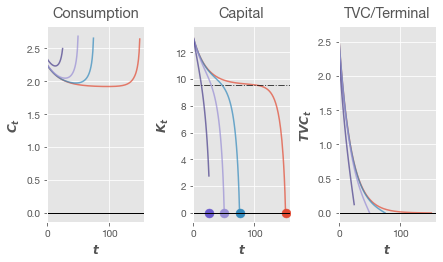

In [23]:
plt.subplot(131)
plt.plot(range(T_new + 1), path_opt_C_new, path_opt_C_2, alpha=0.7)
plt.plot(range(T_new_3 + 1), path_opt_C_3, alpha=0.7)
plt.plot(range(T_new_4 + 1), path_opt_C_4, color="darkslateblue", alpha=0.7)
plt.title("Consumption")
plt.ylabel("$C_t$")
plt.xlabel("$t$")
plt.xlim(0,)
plt.axhline(0, color="black", lw=1)

plt.subplot(132)
plt.plot(range(T_new + 2), path_opt_K_new, path_opt_K_2, alpha=0.7)
plt.plot(range(T_new_3 + 2), path_opt_K_3, alpha=0.7)
plt.plot(range(T_new_4 + 2), path_opt_K_4, color="darkslateblue", alpha=0.7)
plt.axhline(0, color="black", lw=1)
plt.axhline(K_ss, linestyle="-.", color="black", lw=1, alpha=0.7)
plt.title("Capital")
plt.ylabel("$K_t$")
plt.xlabel("$t$")
plt.xlim(0,)
plt.scatter(T_new + 1, 0, s=80)
plt.scatter(T_new_2 + 1, 0, s=80)
plt.scatter(T_new_3 + 1, 0, s=80)
plt.scatter(T_new_4 + 1, 0, s=80, color="slateblue")
plt.subplots_adjust(left=0.2, wspace=0.5, top=0.8)

plt.subplot(133)
plt.plot(range(T_new + 1), path_TVC, path_TVC_2, alpha=0.7)
plt.plot(range(T_new_3 + 1), path_TVC_3, alpha=0.7)
plt.plot(range(T_new_4 + 1), path_TVC_4, color="darkslateblue", alpha=0.7)
plt.title("TVC/Terminal")
plt.ylabel("$TVC_t$")
plt.xlabel("$t$")
plt.xlim(0,)
plt.axhline(0, color="black", lw=1)
plt.subplots_adjust(left=0.0, wspace=0.5, top=0.8)
plt.show()

### $T=+\infty$ economy

We now consider an economy in which $T = +\infty$ 

The appropriate thing to do is to replace terminal condition ([1.13](#1.13)) with 

$$\lim_{T \rightarrow +\infty} \beta^T \frac{\partial u(K_T,K_{T+1})}{\partial K_{T+1}} K_T = 0$$ or:

$$\lim_{T \rightarrow +\infty} \beta^T \mu_T K_T = 0$$

This condition will be satisfied by a path that converges to an optimal  steady state 

We can approximate the optimal path from an arbitrary initial $K_0$ and shooting toward the optimal steady
state $K$at a large but finite$T+1$


In the following code, we do this for  a large $T$; we  shoot towards the **steady state** and plot consumption, capital and the savings rate. 

We know that in the steady state that the saving rate must be fixed and that $\bar s= \frac{f(\bar K)-\bar C}{f(\bar K)}$. 

From ([2.1](#2.1)) the steady state saving rate  equals

<a id='2.8'></a>

$$\bar s =\frac{ \delta \bar{K}}{f(\bar K)} \tag{2.8} \label{2.8}$$. 

The steady-state savings level  $\bar S = \bar s f(\bar K)$ is the amount required to offset capital depreciation each period. 


We first study optimal capital  paths that start below the steady state.




In [18]:
%%capture
T_vlarge=130
K_init_val = K_ss/3 #below our steady state
S_ss = δ*K_ss
C_ss= f(Ā,K_ss,ᾱ)-S_ss
s_ss= S_ss/f(Ā,K_ss,ᾱ)
C_vlarge=np.zeros(T_vlarge+1)
K_vlarge=np.zeros(T_vlarge+2)
K_vlarge[0]=K_init_val
path_opt_C_vlarge,path_opt_K_vlarge,path_opt_mu_vlarge=bisection_method(.3,C_vlarge,K_vlarge,T_vlarge,tol=1e-8,terminal=K_ss)
path_opt_s_vlarge=s(Ā,path_opt_K_vlarge,ᾱ,δ,T_vlarge)

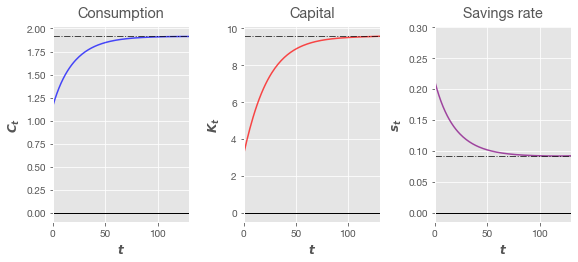

In [19]:
plt.subplot(131)
plt.plot(range(T_vlarge + 1), path_opt_C_vlarge, alpha=0.7, color="blue")
plt.axhline(C_ss, linestyle="-.", color="black", lw=1, alpha=0.7)
plt.title("Consumption")
plt.ylabel("$C_t$")
plt.xlabel("$t$")
plt.xlim(0, T_vlarge)
plt.axhline(0, color="black", lw=1)

plt.subplot(132)
plt.plot(range(T_vlarge + 2), path_opt_K_vlarge, alpha=0.7, color="red")
plt.axhline(0, linestyle="-", color="black", lw=1)
plt.axhline(K_ss, linestyle="-.", color="black", lw=1, alpha=0.7)
plt.title("Capital")
plt.ylabel("$K_t$")
plt.xlabel("$t$")
plt.xlim(0, T_vlarge + 1)

plt.subplot(133)
plt.plot(range(T_vlarge + 1), path_opt_s_vlarge, alpha=0.7, color="purple")
plt.axhline(s_ss, linestyle="-.", color="black", lw=1, alpha=0.7)
plt.axhline(0, color="black", lw=1)
plt.title("Savings rate")
plt.ylabel("$s_t$")
plt.xlabel("$t$")
plt.ylim(-0.015, 0.3)
plt.xlim(0, T_vlarge)
plt.subplots_adjust(left=0.0, wspace=0.4, top=0.8, right=1.2)
plt.show()

Since $K_0<\bar K$, $f'(K_0)>\rho +\delta$. 


The planner  choose a positive saving rate above the steady state level offsetting depreciation that enables us to increase our capital stock. 

Note, $f''(K)<0$,  so as  $K$rises,$f'(K)$ declines.

The planner slowly lowers the savings rate until reaching a steady state where $f'(K)=\rho +\delta$. 

#### Pros:
Note that completely smooth guesses, because iterating directly on EE.

#### Cons
If you guess too low or too high, you miss the SS! For the infinite horizon, eventually all guesses explode or hit 0! Minimum on $\mu$ and hence TVC plot at SS.

#### Solving a second order difference equation